# Ford GoBike System Data Exploration 
## by Solomon Muoghara 

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#df = pd.read_csv('prosperLoanData.csv')
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

> There are 183412 listed bike rides and 16 features of which 9 variables are numeric; integers and floats, and 7 are Objects/Strings values.

### What is/are the main feature(s) of interest in your dataset?

> What user type travel longer distance? What user type spend longer time duration travelling? Is the time duration to travel that distance by the user type affected by whether or not they share their bike?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect the following variables; duration_sec, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude, user_type, share_bike_for_all_trip will answer my questions.

## Univariate Exploration


I will start by looking at the distribution of the main variable of interest; duration_sec

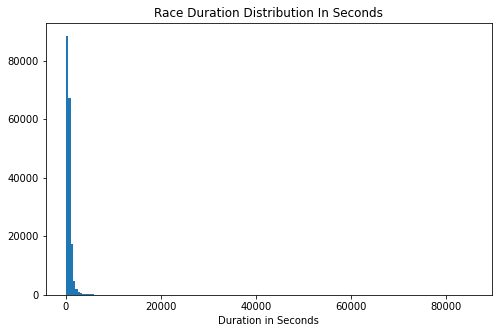

In [6]:
# start with a standard-scaled plot for duration_sec 
binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration in Seconds')
plt.title('Race Duration Distribution In Seconds')
plt.show()


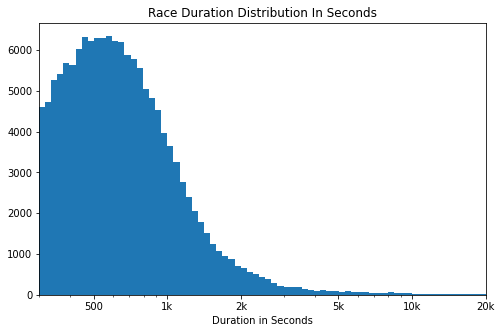

In [7]:
#using log transform to plot duration_sec for a better distribution plot
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Race Duration Distribution In Seconds')
plt.xscale('log')
plt.xlim([300, 2e4])
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Duration in Seconds')
plt.show()

it is still not well distributed for a better Analysis due to the still large range values. Let's try convert the values from seconds to minutes.

In [8]:
# create new column to store the convertion duration_sec to minutes and delete the duration_sec column 
df['duration_min'] = df.duration_sec/60
df.drop(columns = 'duration_sec', inplace=True)

In [9]:
df.duration_min

0          869.750000
1          708.683333
2         1030.900000
3          608.166667
4           26.416667
             ...     
183407       8.000000
183408       5.216667
183409       2.350000
183410       2.316667
183411       4.516667
Name: duration_min, Length: 183412, dtype: float64

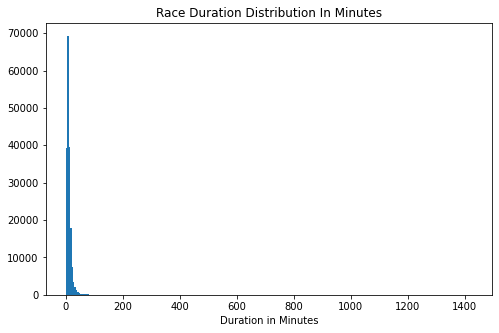

In [10]:
# plot the new column with a standard-scaled plot
binsize = 5
bins = np.arange(0, df['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xlabel('Duration in Minutes')
plt.title('Race Duration Distribution In Minutes')
plt.show()


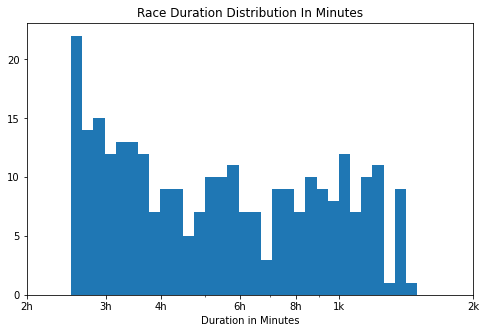

In [11]:
# plotting the duration_min using a log transform 
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.title('Race Duration Distribution In Minutes')
plt.xscale('log')
plt.xlim([250, 2e3])
plt.xticks([2e2,3e2,4e2,6e2,8e2,1e3, 2e3], ['2h','3h','4h','6h','8h','1k', '2k'])
plt.xlabel('Duration in Minutes')
plt.show()

Now the plot is well distributed and you can notice the highest scale between the 200 and 300 minutes, with the very low between 1000 and 1800 minutes. Which is to say that most rides spent around 250 to 300 minutes(log).

In [12]:
#creating a new column Distance to calculate the distance between start and end points 
def haversine(lat1, lon1, lat2, lon2):
    """The function calculates the distance between two points using the longitude and latitude of the 
    start and end points denoted as start points: lon1 and lat1, end points: lon2 and lat2. 
    
    The function performs the standard conversion to meters format which is under the variable R and 
    other haversine latitude and longitude calculations using the python math module.
    
    The function returns the distance between the two points in meters.
    """
    import math
    R = 6373.0 * 1000
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    return R *2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

# the function haversine is being applied to the dataframe the return being stored in a new column df.race_distance 
df['race_distance'] = df.apply(lambda x: haversine(x['start_station_latitude'], x['start_station_longitude'], x['end_station_latitude'], x['end_station_longitude']), axis=1)


In [13]:
df.race_distance

0          32266.374078
1         100238.783984
2         176721.818610
3          17306.747896
4         164004.983682
              ...      
183407    105801.952168
183408     86239.119924
183409     24596.681108
183410     43711.085880
183411     45941.723153
Name: race_distance, Length: 183412, dtype: float64

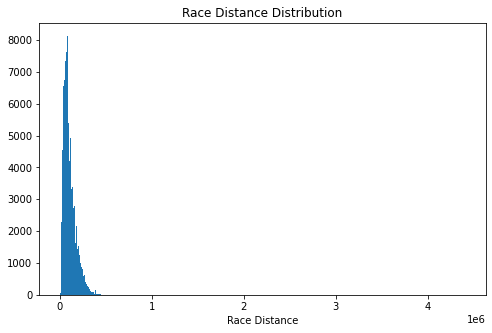

In [14]:
#plot the race_distance in a standard scaled plot
binsize = 5000
bins = np.arange(0, df['race_distance'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'race_distance', bins = bins)
plt.xlabel('Race Distance')
plt.title('Race Distance Distribution')
plt.show()

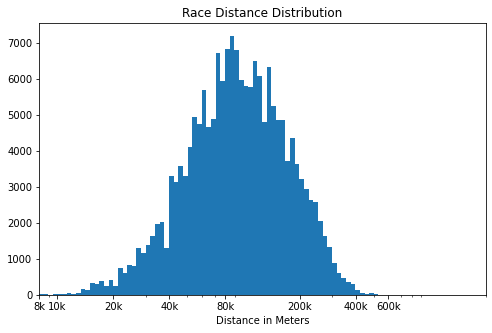

In [15]:
# plotting the race_distance in a log transform format 
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['race_distance'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'race_distance', bins = bins)
plt.title('Race Distance Distribution')
plt.xscale('log')
plt.xlim([10000, 2e6])
plt.xticks([8e3,1e4,2e4,4e4,8e4,2e5,4e5,6e5], 
           ['8k','10k','20k','40k','80k','200k','400k','600k'])
plt.xlabel('Distance in Meters')
plt.show()

The Distribution appears multimodal with less count at the start and the end. The peek of the chart appears around the middle, showing the densely populated plot from the 40k point to the 200k point, of which the peek of the chart is approximately 100k to 120k meters. This plot shows that more racers travel around 40,000 to 200,000 meters.

In [16]:
# investigating the user_type column
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

Text(0.5, 1.0, 'User Type Count Distribution')

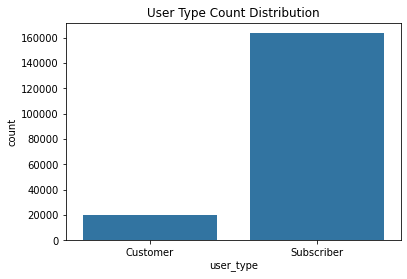

In [17]:
# plotting the user_type column in a countplot
sb.countplot(data = df, x = 'user_type', color = sb.color_palette()[0])
plt.title('User Type Count Distribution')

The visualization shows that there are a lot more subscribers participating in the race than customer. 

In [18]:
# investigating for bike_share_for_all_trip
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

Text(0.5, 1.0, 'Bike Share Distribution')

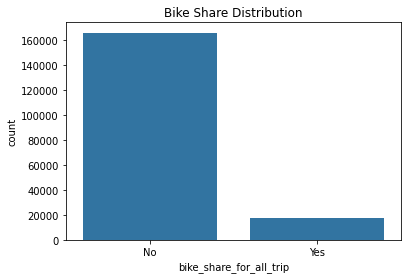

In [19]:
# plotting bike_share_for_all_trip in a countplot
sb.countplot(data = df, x = 'bike_share_for_all_trip', color = sb.color_palette()[0])
plt.title('Bike Share Distribution')

The visualization shows an almost identical plot to that of user_type, which shows a huge number of users not sharing their bike throughout the trip.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> On the duration_sec variable, i performed a transformation using log transform and converted the values from seconds to minutes which i also performed a log transform on due to the large value range of the values in the variable. Both visualizations were bimodal before the log transform. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> During my investigation, i carried out a change of form of the duration_sec data from seconds to minutes by creating a new column duration_min due to the large range of values in seconds. I also created a new column race_distance using the start_station_longitude, start_station_latitude, end_station_longitude, end_station_latitude to calculate for distance in meters, under the function haversine.

## Bivariate Exploration

In [20]:
numeric_variables = ['duration_min','race_distance']
categorical_variables = ['bike_share_for_all_trip','user_type']

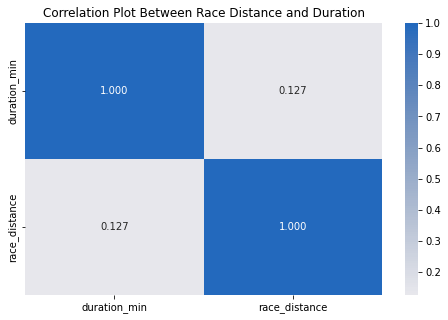

In [21]:
# correlation plot the two numeric variables
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_variables].corr(), annot = True,
           fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot Between Race Distance and Duration')
plt.show()

The heatmap shows a very low correlation between the race duration and race distance of 0.127.

Text(0.5, 1.0, 'Race Distance vs. User Type')

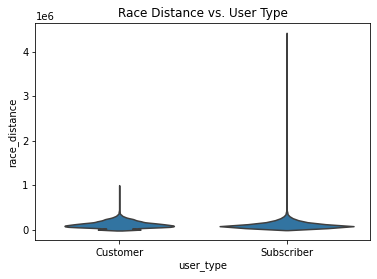

In [22]:
# plotting user_type against race_distance
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='user_type', y='race_distance', color=base_color, inner=None)
plt.title('Race Distance vs. User Type')

The visualization shows more users, customers and subscribers cover the
minimal distance but as well show more subscribers participate in the more longer distance races.

Text(0.5, 1.0, 'Race Duration vs User Type')

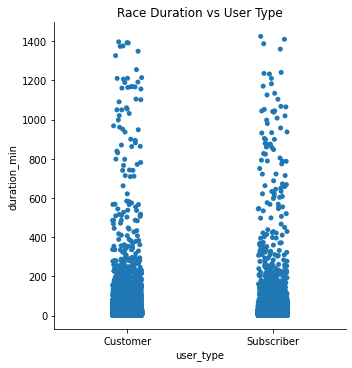

In [23]:
# plotting user_type against duration_min
sb.catplot(data=df, x='user_type', y='duration_min', color=base_color)
plt.title('Race Duration vs User Type')

The visualization shows an almost equal proportion of time spent by both user type in all races.

Text(0.5, 1.0, 'Race Distance vs Bike Share')

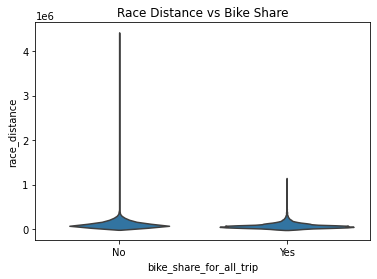

In [24]:
# plotting bike_share_for_all_trip against race_distance
sb.violinplot(data=df, x='bike_share_for_all_trip', y='race_distance', color=base_color, inner=None)
plt.title('Race Distance vs Bike Share')


The visualization shows that more racers who travel longer distance do not share their bike ride but majority of users who share their rideustravel short distance.

Text(0.5, 1.0, 'Race Duration vs. Bike Share')

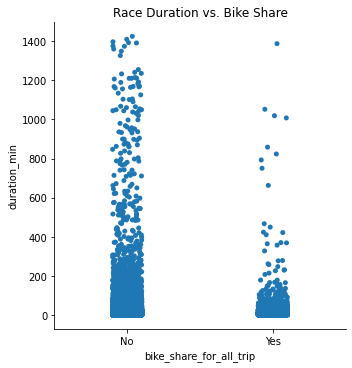

In [25]:
# plotting bike_share_for_all_trip against duration_min
sb.catplot(data=df, x='bike_share_for_all_trip', y='duration_min', color=base_color)
plt.title('Race Duration vs. Bike Share')

The visualization shows that users who share their ride spend less time travelling than those who doesn't. 

In [26]:
cate_counts = df.groupby(['bike_share_for_all_trip','user_type']).size()
cate_counts = cate_counts.reset_index(name='count')
cate_counts = cate_counts.pivot(index='user_type',columns='bike_share_for_all_trip',values='count')

Text(0.5, 1.0, 'Correlation Between User Type And Bike Share')

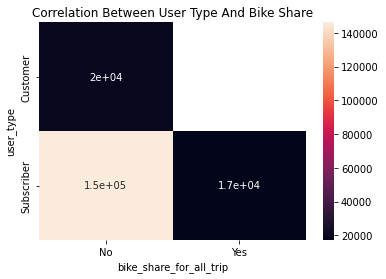

In [27]:
sb.heatmap(cate_counts, annot=True);
plt.title('Correlation Between User Type And Bike Share')

The heatmap shows a high correlation between user = subscribers and riders who doesn't share their bike. 

Text(0.5, 1.0, 'Bike Share vs. User Type')

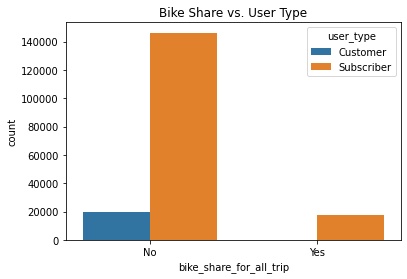

In [28]:
sb.countplot(data=df, x='bike_share_for_all_trip', hue='user_type')
plt.title('Bike Share vs. User Type')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I noticed the high correlation between users who are subscribers and riders who do not share their bike all through their trip.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed in the relationship between the two categorical variables that no customer  shared their bike throughout the race.

## Multivariate Exploration

Let's start by plotting all four variables against eachother and observe their relationship. 

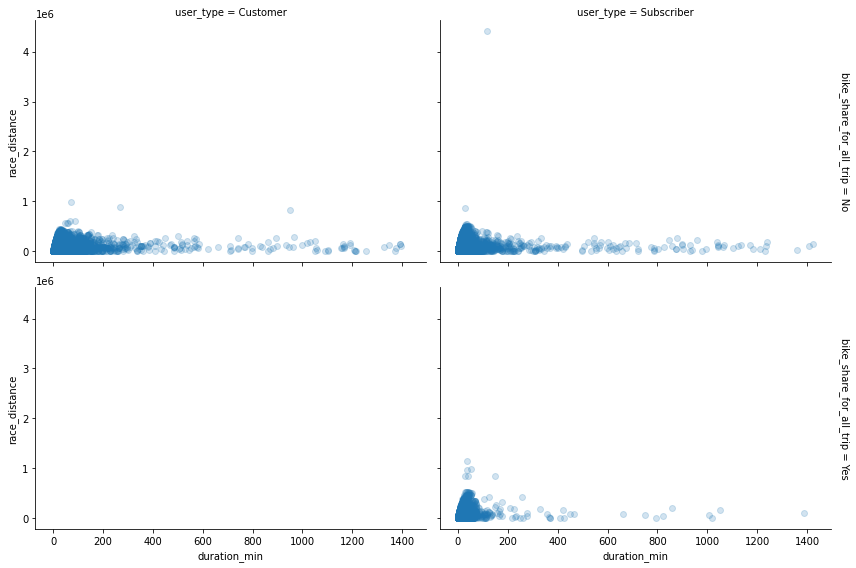

In [29]:
g = sb.FacetGrid(data=df, col='user_type', row='bike_share_for_all_trip',
                 margin_titles=True, height=4, aspect=1.5)
g.map(sb.regplot,'duration_min','race_distance', x_jitter=0.4, scatter_kws={'alpha':1/5}, fit_reg=False);


Clearly, the most obvious thing to note here is that the user_type;customers have value under the bike_share_for_all_trip = Yes, either for duration_min or for race_distance which is an important information to note. And user_type = subscriber have a point peeking under the bike_share_for_all_trip, with the other values being densed populated on or below 1.

Text(0.5, 1.0, 'Users Race Duration Distribution & Bike Share')

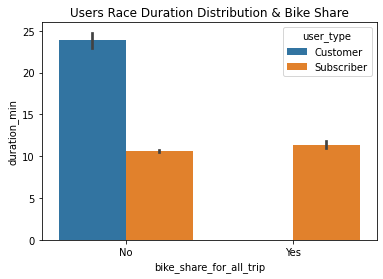

In [30]:
sb.barplot(data=df, hue='user_type', y='duration_min',x='bike_share_for_all_trip',)
plt.title('Users Race Duration Distribution & Bike Share') 


The above visualization plots three variables against each other, bike_share..., user_type and duration_min. And just as the previous visualization, user_type=customer have no value under bike_share...= Yes, but it does have a higher value under bike_share.. = No, which means that more user_type = customer who didn't share their bike for all trip spend more time on the road getting to their end points than both subscribers who share and didn't share.

Text(0.5, 1.0, 'Users Race Distance Distribution & Bike Share')

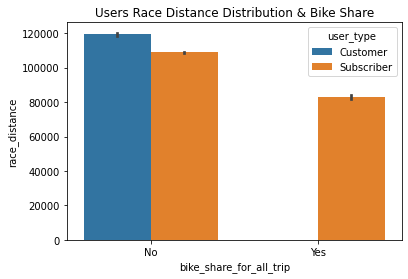

In [31]:
sb.barplot(data=df, x='bike_share_for_all_trip',y='race_distance',hue='user_type',)
plt.title('Users Race Distance Distribution & Bike Share')


The above visualization plots three variables against each other, bike_share..., race_distance and user_type. Again, no user_type = customer value on bike_share... = Yes and also customer who didn't share their bike travelling longer distance than both subscribers who share their bike and those who didn't. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationship i observed is how close the distance traveled by subscribers who did not share their binotis to that of customers who didn't share their bike with a few thousands. 

### Were there any interesting or surprising interactions between features?

> The interesting interaction i noticed between the features is that the customer users didn't at any time of the race share their bike. I also noticed how interestingly how subscribers who didn't share their bike spend a lot less time duration than customers who did same, even when the next visualization showed how close their distance traveled are.

## Conclusions
Answering my questions;
##### What user type travel longer distance?
- The Customers user type.

##### What user type spend longer time duration travelling?
- The Customers user type.

##### Is the time duration to travel the distance by the user type affected by whether or not they share their bike?
- Yes, because the subscribers user type is seen through the visualization travelling almost the same distance traveled by the customers user type but is as well spending less time duration doing it.
